In [18]:
import csv
import random
import star_functions as nana
import glob
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import ascii
import numpy as np
from astropy import units as u
import matplotlib.ticker as ticker
import importlib
import os
importlib.reload(nana)
%reload_ext autoreload
%autoreload 2
from datetime import datetime
from lightkurve import LightCurve
import time
import pandas as pd


In [2]:
with open('KICids.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  #this skips the header
    kicz = list(reader)

for row in kicz:
    row[0] = int(str(int(row[0]))) 

In [3]:
interesting_kics = np.array([5952403, 6548447, 7899980, 11044372, 6934963, 11140501, 10934758, 9941242])

In [3]:
rando_kics = random.sample(kicz, 13)

In [4]:
rando_kics

[[10518808],
 [7129648],
 [10789154],
 [11180974],
 [8804218],
 [10026372],
 [12404305],
 [6756579],
 [5715436],
 [4814371],
 [8881126],
 [11954852],
 [6615201]]

nana.get_kepler_data() took 0.5155069828033447 seconds
Running median power: [1.04484633e-10 1.04484633e-10 1.04484633e-10 ... 7.09668567e-11
 8.42922043e-11 8.91299439e-11]
Running median power length: 105739
power mini [1.06618285e-10 6.22313533e-11 1.10982596e-11 ... 3.63212012e-11
 2.93272168e-12 2.25531410e-11]
power_mini length: 105739


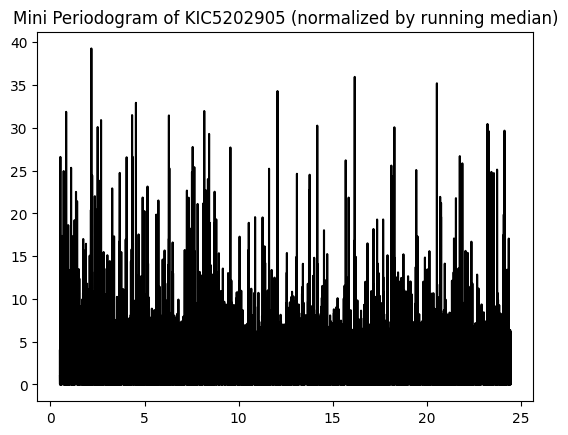

region_and_freq() took 23.639885902404785 seconds
delta_chi2s for KIC5202905: [1.27738206e+03 1.95200000e+05 3.65207812e+03 4.08117969e+03
 3.63137138e+02 2.31514297e+02 2.19909942e+02 6.21789783e+03
 9.02722778e+01 5.62967022e+02 2.52436035e+02 1.50061719e+04
 2.89893295e+02 3.95335547e+03 1.50197969e+04 2.56753906e+04
 3.30394562e+02 2.56766983e+02 1.26532581e+03 1.54010449e+03
 4.94960315e+03 2.21071859e+02 6.64948647e+02 3.55685156e+03
 1.39742798e+02 1.37689258e+03 2.79945068e+01 3.30706773e+02
 1.17478925e+03 6.38554443e+02 1.94692505e+02 4.81331250e+04
 2.36507525e+02 5.80739453e+03 2.06849701e+02 4.00028125e+03
 6.26320801e+02 2.29230859e+03 3.34028125e+04 7.09664059e+02
 2.98238281e+03 5.97900391e+01 1.77921436e+03 2.95175156e+02
 4.64394432e+02 3.54991577e+02 1.54714062e+03 3.48649219e+03
 7.59041519e+01 5.71400235e+03 1.37027519e+02 1.45396094e+04
 1.85811523e+02 3.82508125e+04 6.08815430e+02 2.34444824e+02
 1.86832939e+02 1.50812924e+02 1.33704844e+04 1.42841705e+02
 1.9612

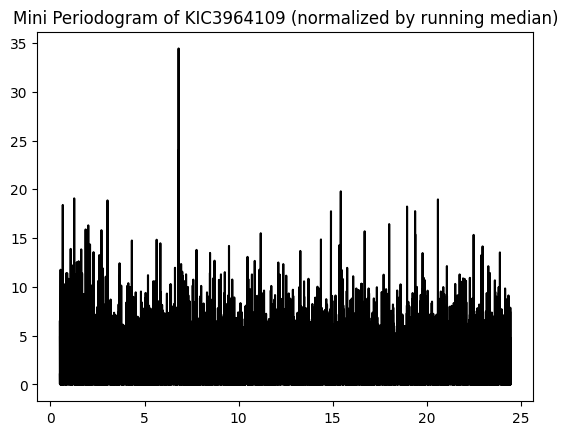

region_and_freq() took 23.828336000442505 seconds
delta_chi2s for KIC3964109: [3020.67089844   70.31809235   16.97537231   61.53902638   20.87282562
   12.74099195   62.7755098    17.37641525   10.72436523   18.16595459
   10.36818314   34.11914706   22.5613929    29.04839587   13.14471436
   27.52949834   20.80285645   15.47810364   16.30887222   12.20541382
   21.00411987   15.65844727   35.90447998   30.2236557    18.27464104
    8.55052185   62.46124768   59.12710738   13.91707516   21.67594147
   36.17626953   11.64096069   14.40885925   13.06017303   11.88197327
   17.90055847   12.51243019   19.11207199   12.33200073   43.04125977
   50.29910421   12.9921627    13.25769043   10.82324219   20.54527664
   32.97526789    9.4168129    20.44494629   18.44189453   12.96045685
   13.07920957   53.93737793   15.29626465   24.05546175   23.17443848
   32.2505188    18.74027061   18.36088753   29.89306641   43.1747961
   40.26458263   35.17525589   25.23206764   45.40124512   11.89571857


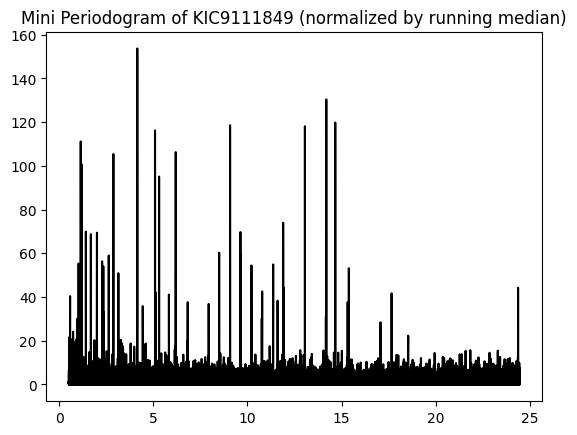

region_and_freq() took 30.138803958892822 seconds
delta_chi2s for KIC9111849: [1.92417129e+04 6.26994385e+02 2.34480762e+03 3.63937231e+03
 8.54927734e+03 2.91151982e+04 2.58806366e+05 1.03100897e+03
 1.60410480e+04 5.89671887e+03 2.97206067e+03 1.14499805e+03
 1.93847726e+03 7.41222839e+02 1.44020056e+03 2.61163293e+03
 1.66294067e+03 9.57048302e+02 2.63831265e+04 4.22844424e+03
 2.02192719e+02 3.02148468e+02 1.59275319e+03 2.57923645e+02
 6.34787804e+02 2.80574585e+02 2.36066132e+01 2.83368011e+02
 4.34036301e+02 2.37500000e+02 3.90860626e+02 1.84486526e+02
 4.37935104e+01 5.18073364e+02 8.61276733e+02 4.00225128e+02
 3.38198250e+02 5.00427784e+02 2.38046692e+02 1.91850555e+02
 6.18836912e+02 7.43237305e+01 1.72981441e+02 2.54294891e+01
 6.65013332e+02 4.43114666e+02 9.13837442e+01 1.42866735e+02
 2.96381843e+02 1.97798318e+02 5.72126679e+01 1.15751804e+02
 4.80379667e+01 1.40165820e+03 1.30662479e+01 5.66097412e+01
 1.43228516e+02 7.30615234e+01 6.63379307e+01 8.08579531e+01
 3.1708

In [22]:
for star in stars:
    nana.find_modes_in_star(star, False, True, max_peaks = 100)

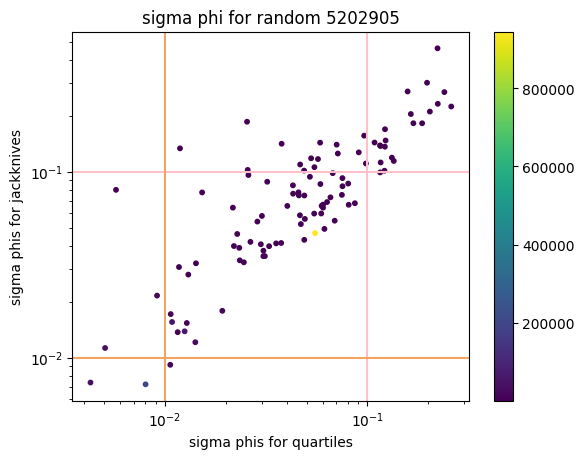

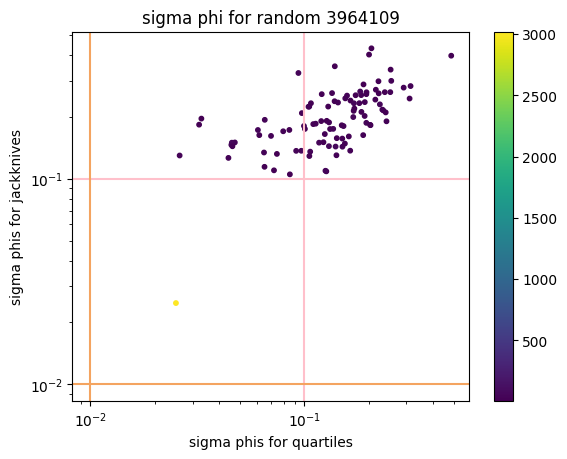

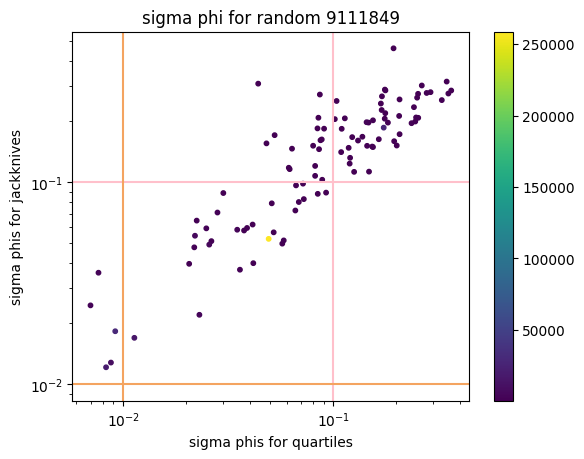

In [23]:
all_delta_scutis = [9845898]
for kic in stars:
    output_dir = os.path.join("sigmaphi_plots", f"random_{kic}")
    os.makedirs(output_dir, exist_ok=True)
    
    kic_csv = 'KIC' + str(kic) + '_stats.csv'
    data = pd.read_csv(kic_csv, header = 0, usecols = ['Delta chi2', 'Sigma phi(4)','Sigma phi(jack)', 'Invalid indices'])
    
    delta_chi2 = data.iloc[:,0]
    phi_4 = data.iloc[:,1]
    phi_j = data.iloc[:,2]
    
    # invalid_indices = data.iloc[:,3]
    # mask_invalid = ~np.isnan(invalid_indices)
    # mask_valid = np.isnan(invalid_indices)


    
    plt.scatter(phi_4, phi_j, c = delta_chi2, marker = 'o', s = 10, label = 'delta chi >= 100', cmap = "viridis")
    #plt.scatter(phi_4[mask_invalid], phi_j[mask_invalid], marker = 'o', s = 5, color = 'black', label = 'delta chi < 100')
    plt.title(f"sigma phi for random {kic}")
    plt.xlabel("sigma phis for quartiles")
    plt.ylabel("sigma phis for jackknives")
    plt.axvline(0.1, color = 'pink')
    plt.axhline(0.1, color = 'pink')
    plt.axvline(0.01, color = 'sandybrown')
    plt.axhline(0.01, color = 'sandybrown')
    # plt.xlim(0, 0.5)
    # plt.ylim(0, 0.5)
    plt.loglog()
    #plt.savefig(os.path.join(output_dir, f"delta_scuti_{kic}_.png"))
    #plt.legend()
    plt.colorbar()
    plt.show()
    

    # plt.scatter(phi_4, phi_j, marker = 'o', s = 5)
    # plt.title(f"zoomed in sigma phi for delta scuti star{kic}")
    # plt.xlabel("sigma phis for quartiles")
    # plt.ylabel("sigma phis for jackknives")
    # plt.xlim(0, 0.1)
    # plt.ylim(0, 0.1)
    # plt.show()

In [15]:
stars = [5202905, 3964109, 9111849]

delt chi 0       1277.382100
1     195200.000000
2       3652.078100
3       4081.179700
4        363.137140
5        231.514300
6        219.909940
7       6217.897800
8         90.272278
9        562.967020
10       252.436040
11     15006.172000
12       289.893300
13      3953.355500
14     15019.797000
15     25675.391000
16       330.394560
17       256.766980
18      1265.325800
19      1540.104500
20      4949.603100
21       221.071860
22       664.948650
23      3556.851600
Name: Delta chi2, dtype: float64


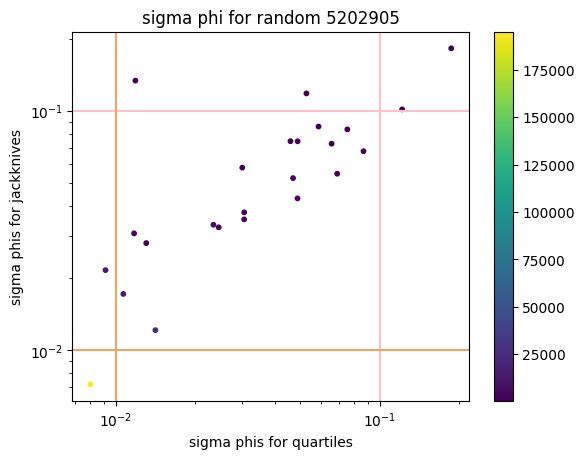

delt chi 0     3020.670900
1       70.318092
2       16.975372
3       61.539026
4       20.872826
5       12.740992
6       62.775510
7       17.376415
8       10.724365
9       18.165955
10      10.368183
11      34.119147
12      22.561393
13      29.048396
14      13.144714
15      27.529498
16      20.802856
17      15.478104
18      16.308872
19      12.205414
20      21.004120
21      15.658447
22      35.904480
23      30.223656
Name: Delta chi2, dtype: float64


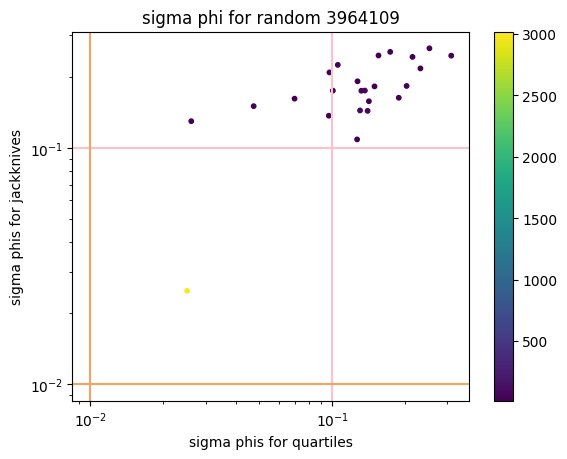

delt chi 0      19241.71300
1        626.99438
2       2344.80760
3       3639.37230
4       8549.27730
5      29115.19800
6     258806.37000
7       1031.00900
8      16041.04800
9       5896.71890
10      2972.06070
11      1144.99800
12      1938.47730
13       741.22284
14      1440.20060
15      2611.63290
16      1662.94070
17       957.04830
18     26383.12600
19      4228.44420
20       202.19272
21       302.14847
22      1592.75320
23       257.92365
Name: Delta chi2, dtype: float64


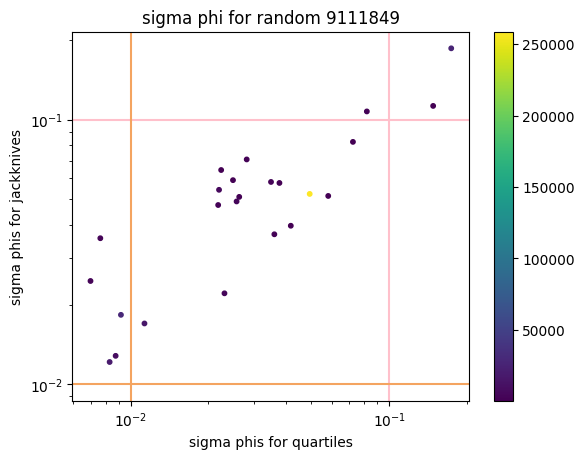

In [21]:
all_delta_scutis = [9845898]
for kic in stars:
    output_dir = os.path.join("sigmaphi_plots", f"random_{kic}")
    os.makedirs(output_dir, exist_ok=True)
    
    kic_csv = 'KIC' + str(kic) + '_stats.csv'
    data = pd.read_csv(kic_csv, header = 0, usecols = ['Delta chi2', 'Sigma phi(4)','Sigma phi(jack)', 'Invalid indices'])
    
    delta_chi2 = data.iloc[:,0]
    print("delt chi", delta_chi2)
    phi_4 = data.iloc[:,1]
    phi_j = data.iloc[:,2]
    
    # invalid_indices = data.iloc[:,3]
    # mask_invalid = ~np.isnan(invalid_indices)
    # mask_valid = np.isnan(invalid_indices)


    
    plt.scatter(phi_4, phi_j, c = delta_chi2, marker = 'o', s = 10, label = 'delta chi >= 100', cmap = "viridis")
    #plt.scatter(phi_4[mask_invalid], phi_j[mask_invalid], marker = 'o', s = 5, color = 'black', label = 'delta chi < 100')
    plt.title(f"sigma phi for random {kic}")
    plt.xlabel("sigma phis for quartiles")
    plt.ylabel("sigma phis for jackknives")
    plt.axvline(0.1, color = 'pink')
    plt.axhline(0.1, color = 'pink')
    plt.axvline(0.01, color = 'sandybrown')
    plt.axhline(0.01, color = 'sandybrown')
    # plt.xlim(0, 0.5)
    # plt.ylim(0, 0.5)
    plt.loglog()
    #plt.savefig(os.path.join(output_dir, f"delta_scuti_{kic}_.png"))
    #plt.legend()
    plt.colorbar()
    plt.show()
    

    # plt.scatter(phi_4, phi_j, marker = 'o', s = 5)
    # plt.title(f"zoomed in sigma phi for delta scuti star{kic}")
    # plt.xlabel("sigma phis for quartiles")
    # plt.ylabel("sigma phis for jackknives")
    # plt.xlim(0, 0.1)
    # plt.ylim(0, 0.1)
    # plt.show()